科比·布莱恩特是美国著名的职业篮球运动员，曾经效力于洛杉矶湖人队20年，在场上展现出了非凡的天赋和超强的技巧，成为了NBA历史上最伟大的球员之一。科比在其职业生涯中收获了5个总冠军、18个全明星、2个得分王等多项荣誉。

该数据集分析目标：

- 读取科比职业生涯数据集
- 对该数据集进行探索性分析
- 建立集成算法模型
- 模型调参，选择最优的模型参数
- 对测试集进行预测

### 1.读取数据集

In [4]:
#导入所需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 1000)#可显示1000行
pd.set_option("display.max_columns", 1000)#可显示1000列

In [5]:
raw = pd.read_csv('C:\\Users\\ROG\\Desktop\\python\\kobe_data.csv')
raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [6]:
raw.shape

(30697, 25)

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

由上述结果可以看出，shot_made_flag这个特征是存在缺失值的。所以接下来我们会将数据集切分为两部分，将有shot_made_flag的数据集作为训练集，缺失shot_made_flag的数据集作为测试集。通过对训练集进行建模，来预测测试集上的shot_made_flag值。

In [8]:
raw.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
action_type,30697,57,Jump Shot,18880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
combined_shot_type,30697,6,Jump Shot,23485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_event_id,30697,NaN,NaN,NaN,249.191,150.004,2,110,253,368,659
game_id,30697,NaN,NaN,NaN,2.47641e+07,7.75517e+06,2e+07,2.05001e+07,2.09004e+07,2.96005e+07,4.99001e+07
lat,30697,NaN,NaN,NaN,33.9532,0.0877914,33.2533,33.8843,33.9703,34.0403,34.0883
loc_x,30697,NaN,NaN,NaN,7.1105,110.125,-250,-68,0,95,248
loc_y,30697,NaN,NaN,NaN,91.1075,87.7914,-44,4,74,160,791
lon,30697,NaN,NaN,NaN,-118.263,0.110125,-118.52,-118.338,-118.27,-118.175,-118.022
minutes_remaining,30697,NaN,NaN,NaN,4.88562,3.4499,0,2,5,8,11
period,30697,NaN,NaN,NaN,2.51943,1.15367,1,1,3,3,7


### 2.数据探索性分析

#### 2.1单变量分析

In [9]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

Text(0.5, 1.0, '科比职业生涯不同出手类型的次数统计')

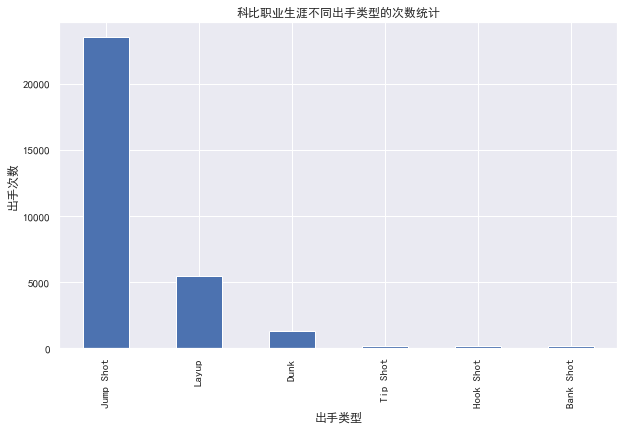

In [10]:
plt.figure(figsize = (10,6))
raw['combined_shot_type'].value_counts().plot(kind = 'bar')
plt.xlabel('出手类型');plt.ylabel('出手次数');plt.title('科比职业生涯不同出手类型的次数统计')

由上图可知，科比最常用的进攻方式就是跳投，其次是上篮。

(array([0, 1]), [Text(0, 0, '2PT Field Goal'), Text(1, 0, '3PT Field Goal')])

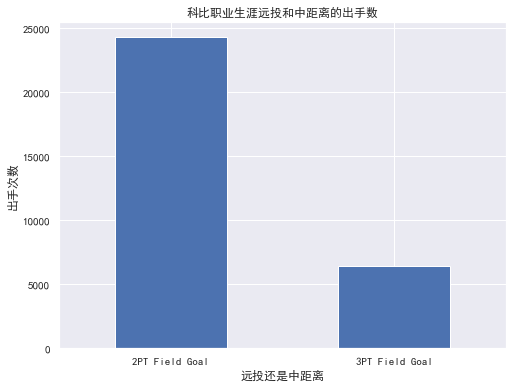

In [11]:
plt.figure(figsize = (8,6))
raw['shot_type'].value_counts().plot(kind = 'bar')
plt.xlabel('远投还是中距离');plt.ylabel('出手次数');plt.title('科比职业生涯远投和中距离的出手数')
plt.xticks(rotation = 0)

由上图可知，科比的进攻手段主要以中距离进攻为主，而非三分远投。

Text(0.5, 1.0, '科比出手距离的分布')

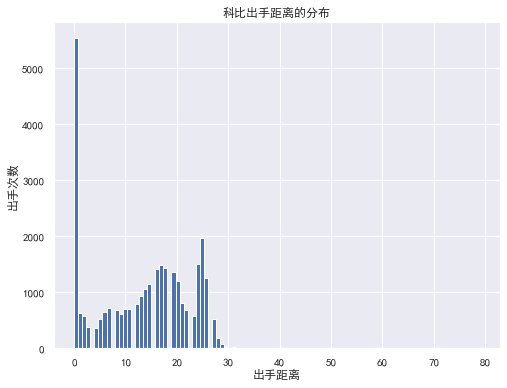

In [12]:
plt.figure(figsize = (8,6))
raw['shot_distance'].hist(bins = 100)
plt.xlabel('出手距离');plt.ylabel('出手次数');plt.title('科比出手距离的分布')

由上图可知，科比出手时多是靠近篮板。

Text(0.5, 1.0, '科比出手距离的分布')

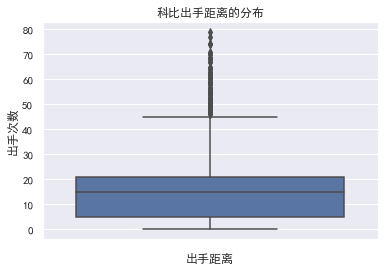

In [13]:
#箱型图
plt.figure(figsize = (6,4))
sns.boxplot(data = raw,y = 'shot_distance')
plt.xlabel('出手距离');plt.ylabel('出手次数');plt.title('科比出手距离的分布')

由上图可以看出科比在篮下的出手最多，大约75%的出手为2分球，25%的三分球。

Text(0.5, 1.0, 'shot_zone_range')

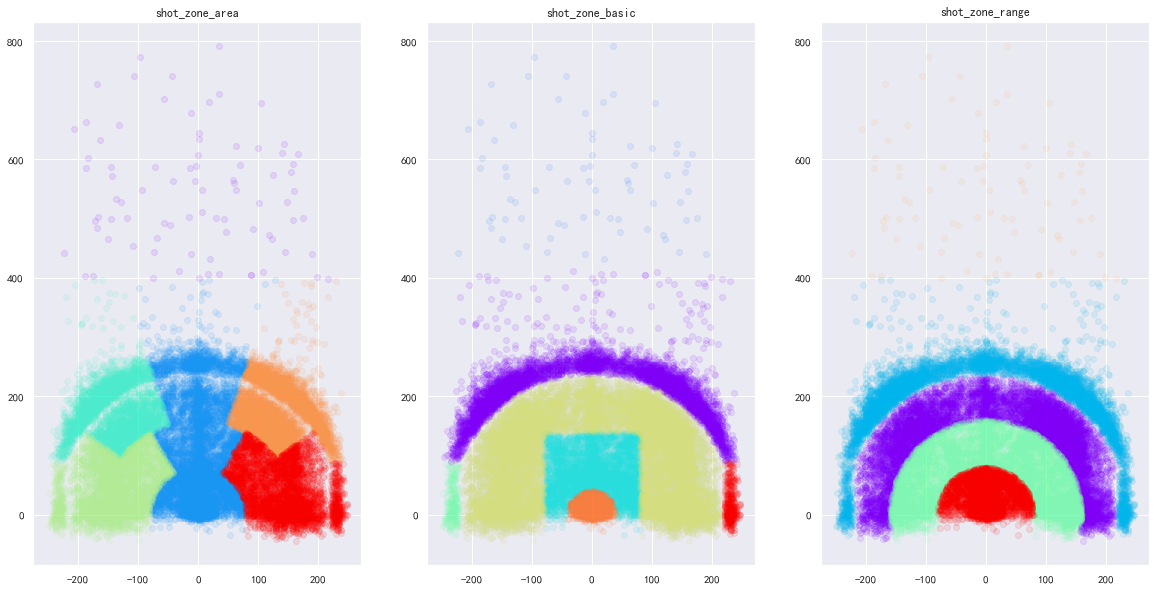

In [14]:
#可视化科比的出手区域
import matplotlib.cm as cm
plt.figure(figsize  = (20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = raw.groupby(feat)
    cs = cm.rainbow(np.linspace(0,1,len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1].loc_x,g[1].loc_y,color = c,alpha = alpha)
        
plt.subplot(1,3,1)
scatter_plot_by_category(raw['shot_zone_area'])
plt.title('shot_zone_area')

plt.subplot(1,3,2)
scatter_plot_by_category(raw['shot_zone_basic'])
plt.title('shot_zone_basic')

plt.subplot(1,3,3)
scatter_plot_by_category(raw['shot_zone_range'])
plt.title('shot_zone_range')

In [15]:
raw['shot_distance'].describe()

count    30697.000000
mean        13.437437
std          9.374189
min          0.000000
25%          5.000000
50%         15.000000
75%         21.000000
max         79.000000
Name: shot_distance, dtype: float64

#### 2.双变量分系

In [16]:
#提出shot_made_falg非空的数据集
kobe = raw[pd.notnull(raw['shot_made_flag'])]
print(kobe.shape)

(25697, 25)


In [17]:
kobe['shot_made_flag'] = kobe['shot_made_flag'].astype(np.object)

Text(0.5, 1.0, '科比的出手命中率')

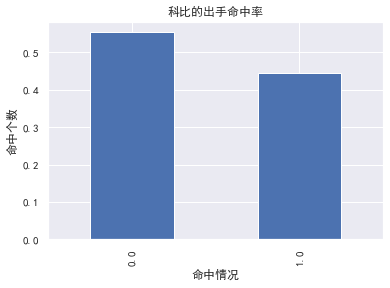

In [18]:
plt.figure(figsize = (6,4))
kobe['shot_made_flag'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel('命中情况');plt.ylabel('命中个数');plt.title('科比的出手命中率')

该样本只是整个数据集中的部分样本，不能反映出其职业生涯的真实命中率。

<AxesSubplot:xlabel='combined_shot_type', ylabel='shot_made_flag'>

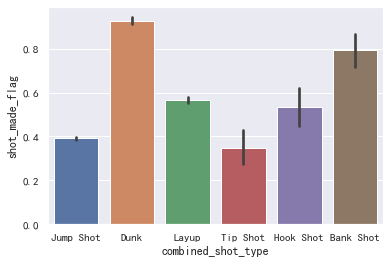

In [19]:
#不同出手类型与命中率之间的关系

sns.barplot(data = kobe,x = 'combined_shot_type',y = 'shot_made_flag')

由上图可知，命中率从高往低依次为：扣篮-擦板-上篮-勾手-跳投-补篮

<AxesSubplot:xlabel='shot_type', ylabel='shot_made_flag'>

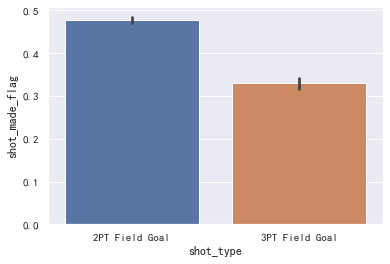

In [20]:
#两分球与三分球的命中率

sns.barplot(data = kobe,x = 'shot_type',y = 'shot_made_flag')

由上图可知，两分球命中率大于三分球。

In [21]:
kobe.groupby('shot_type')['shot_made_flag'].value_counts(normalize = True)

shot_type       shot_made_flag
2PT Field Goal  0.0               0.522652
                1.0               0.477348
3PT Field Goal  0.0               0.670732
                1.0               0.329268
Name: shot_made_flag, dtype: float64

由上述结果可以看出科比的两分球命中率为47.7%，三分球的命中率为32.9%。

<AxesSubplot:xlabel='shot_distance', ylabel='shot_made_flag'>

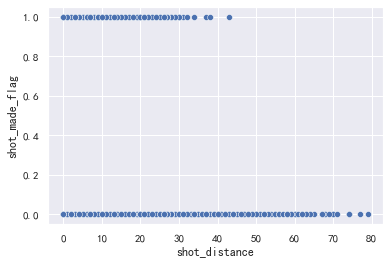

In [22]:
#出手距离与命中率之间的关系
sns.scatterplot(data = kobe, x = 'shot_distance',y = 'shot_made_flag' )

<AxesSubplot:xlabel='shot_made_flag', ylabel='shot_distance'>

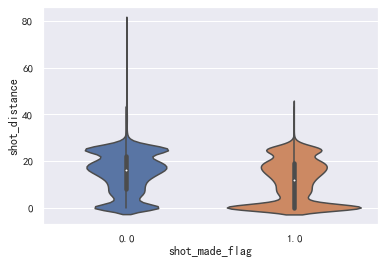

In [23]:
sns.violinplot(data = kobe, y = 'shot_distance',x = 'shot_made_flag' )

由上图可以看出，出手距离越远，命中率越低。

### 3.数据预处理

In [24]:
raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [25]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [26]:
#删除无影响的id

drop_ids = ['game_event_id','game_id','team_id','shot_id']
for feature in drop_ids:
    raw = raw.drop(feature,axis = 1)

In [27]:
#创建新特征time_remaining替代minutes_remaining和seconds_remaining

raw['time_remaining'] = raw['minutes_remaining']*60 + raw['seconds_remaining']

In [28]:
#删除minutes_remaining和seconds_remaining

raw = raw.drop(['minutes_remaining','seconds_remaining'],axis = 1)

In [29]:
raw['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [30]:
#season数据简化
raw['season'] = raw['season'].apply(lambda x:int(x.split('-')[1]))
raw['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0], dtype=int64)

In [31]:
#lat,lon,loc_x,loc_y表达的是相同的含义，删除lat,lon特征
raw = raw.drop(['lat','lon'],axis = 1)

In [32]:
#action_type和combined_shot_type表达的含义相近，删除action_type
raw = raw.drop(['action_type'],axis = 1)

In [33]:
#shot_zone_area,shot_zone_basic,shot_zone_range表达的也是相同的含义，保留shot_zone_area
raw = raw.drop(['shot_zone_basic','shot_zone_range'],axis = 1)

In [34]:
#删除team_name和game_date
raw = raw.drop(['team_name','game_date'],axis = 1)

In [35]:
#matchup和opponent表达的是相同的含义，保留opponent
raw = raw.drop('matchup',axis = 1)

In [36]:
#优化后的数据集的信息
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   combined_shot_type  30697 non-null  object 
 1   loc_x               30697 non-null  int64  
 2   loc_y               30697 non-null  int64  
 3   period              30697 non-null  int64  
 4   playoffs            30697 non-null  int64  
 5   season              30697 non-null  int64  
 6   shot_distance       30697 non-null  int64  
 7   shot_made_flag      25697 non-null  float64
 8   shot_type           30697 non-null  object 
 9   shot_zone_area      30697 non-null  object 
 10  opponent            30697 non-null  object 
 11  time_remaining      30697 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.8+ MB


combined_shot_type,shot_type,shot_zone_area,opponent为object类型，对这几个特征做one_hot_enncoding编码。

In [37]:
raw = pd.get_dummies(raw)
raw.head()

,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,time_remaining,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot,shot_type_2PT Field Goal,shot_type_3PT Field Goal,shot_zone_area_Back Court(BC),shot_zone_area_Center(C),shot_zone_area_Left Side Center(LC),shot_zone_area_Left Side(L),shot_zone_area_Right Side Center(RC),shot_zone_area_Right Side(R),opponent_ATL,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NJN,opponent_NOH,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,167,72,1,0,1,18,NaN,627,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-157,0,1,0,1,15,0.0,622,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,-101,135,1,0,1,16,1.0,465,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,138,175,1,0,1,22,0.0,412,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2,0,1,0,1.0,379,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
raw.shape

(30697, 55)

In [39]:
#将数据集分为训练集和测试集

train_data = raw[pd.notnull(raw['shot_made_flag'])]
test_data = raw[pd.isnull(raw['shot_made_flag'])]

print('训练集的大小:',train_data.shape)
print('测试集的大小:',test_data.shape)

训练集的大小: (25697, 55)
测试集的大小: (5000, 55)


由于该测试集没有标签，所以我们需要通过交叉验证的方式将训练集分为训练样本和验证样本，用验证集来评估模型的好坏。最终选取最好的模型，对测试样本进行预测。

In [49]:
from sklearn.model_selection import train_test_split

# 将数据和标签分别存入 X 和 y
X = train_data.drop('shot_made_flag', axis=1)
y = train_data['shot_made_flag']

# 使用 train_test_split 分割数据
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print('训练样本的大小:',X_train.shape)
print('验证样本的大小:',X_val.shape)


训练样本的大小: (20557, 54)
验证样本的大小: (5140, 54)


In [50]:
#准备数据，将训练数据分为特征个标签，删掉测试数据中的shot_made_flag列

train_labels = train_data['shot_made_flag']
train_features = train_data.drop('shot_made_flag',axis = 1)

test_features = test_data.drop('shot_made_flag',axis = 1)

### 4.建立随机森林模型

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

#初始化一个随机森林模型
RFC = RandomForestClassifier()

#网格搜索gridsearchcv寻找最佳的模型参数
param_grid = {'n_estimators':[40,80,120,160,200],
             'max_depth':[3,4,5,6,7,8,9,10],
             'min_samples_split':[3,4,5,6,7]}
grid = GridSearchCV(RFC,param_grid = param_grid,cv = 5,verbose = 2,n_jobs = -1)
t1 = time.time()
grid.fit(train_features,train_labels)
t2 = time.time()
print('模型的训练时间{}'.format(t2 - t1))
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



# 使用交叉验证评估模型
scores = cross_val_score(model, X_train, y_train, cv=5)

# 打印每次交叉验证的得分
print('交叉验证得分:', scores)

# 打印交叉验证的平均得分
print('平均得分:', scores.mean())



Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


模型的训练时间111.70556426048279
交叉验证得分: [0.57611868 0.59192607 0.58306981 0.58939431 0.57115057]
平均得分: 0.5823318878741386


In [43]:
#打印
grid.best_params_

{'max_depth': 5, 'min_samples_split': 7, 'n_estimators': 40}

In [56]:
# 用所有的训练数据拟合模型
model.fit(X, y)

# 对测试集进行预测
predictions = model.predict(test_data.drop('shot_made_flag', axis=1))


In [57]:
best_model = grid.best_estimator_

In [58]:
test_flag = best_model.predict(test_features)

In [59]:
print(test_flag[:10])

[0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]


In [60]:
test_data['shot_made_flag'] = test_flag

In [61]:
#输出
test_data.to_csv('kobe_prediction.csv')

In [62]:
# 预测测试数据
predictions = model.predict(test_data.drop('shot_made_flag', axis=1))

# 将预测结果与测试集的 ID 信息（如果有的话）组合为一个 DataFrame
output = pd.DataFrame({'Id': test_data.index, 'Shot_made_flag': predictions})

# 将结果输出为 CSV 文件
output.to_csv('submission.csv', index=False)
